# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [13]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [21]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
# YOUR CODE HERE!
stock_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

TSLA = stock_data[stock_data['symbol']== 'TSLA'].drop('symbol', axis=1)
KO = stock_data[stock_data['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
stock_data=pd.concat([TSLA, KO], axis = 1, keys=['TSLA', 'KO'])


# Display sample data
stock_data.head()

TSLA                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-05-01 04:00:00+00:00  238.85  240.0000  231.50  234.01  10704355   
2019-05-02 04:00:00+00:00  245.65  247.1300  237.72  244.10  18167261   
2019-05-03 04:00:00+00:00  244.00  256.6100  243.49  255.03  23740838   
2019-05-06 04:00:00+00:00  250.00  258.3499  248.50  255.34  10860343   
2019-05-07 04:00:00+00:00  256.80  257.2100  245.10  247.06  10261408   

                                                      KO                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2019-05-01 04:00:00+00:00      108382  234.544288  48.95  49.0750  48.55   
2019-05-02 04:00:00+00:00      173521  242.763484  48.53  48.7657  48.27   
2019-05-03 04:00:00+00:00      205076  252.330502  48.60  48.9600  48.52   
2019-05-06 04:00:00+00:00       93066  254.021222  48.33  48.6100  48.26   
2019-05-07 04:00:00+00:00      103693  249.863277  48.23  48.2900  47.77   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2019-05-01 04:00:00+00:00  48.59  10551594       55430  48.792137  
2019-05-02 04:00:00+00:00  48.39   8724932       49477  48.453170  
2019-05-03 04:00:00+00:00  48.72   7076949       39003  48.773171  
2019-05-06 04:00:00+00:00  48.47   8658209       44597  48.465858  
2019-05-07 04:00:00+00:00  48.00  12487481       59828  48.012280

## Pick closing prices and compute the daily returns

In [30]:
# Create and empty DataFrame for closing prices
# YOUR CODE HERE!
closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
# YOUR CODE HERE!
closing_prices['TSLA'] = stock_data['TSLA']['close']
closing_prices['KO'] = stock_data['KO']['close']

# Drop the time component of the date
# YOUR CODE HERE!
closing_prices.index = closing_prices.index.date

# Compute daily returns
# YOUR CODE HERE!
daily_returns = closing_prices.pct_change().dropna()

# Display sample data
daily_returns

,TSLA,KO
2019-05-02,0.043118,-0.004116
2019-05-03,0.044777,0.006820
2019-05-06,0.001216,-0.005131
2019-05-07,-0.032427,-0.009697
2019-05-08,-0.008986,-0.003125
...,...,...
2020-04-27,0.101496,0.029716
2020-04-28,-0.037095,-0.000855
2020-04-29,0.040813,0.008130
2020-04-30,-0.023273,-0.026104


In [31]:
# Generate descriptive statistics
# YOUR CODE HERE!

daily_returns.describe()

,TSLA,KO
count,253.000000,253.000000
mean,0.005515,-0.000056
std,0.048388,0.019682
min,-0.185778,-0.096725
25%,-0.011681,-0.006709
50%,0.004019,0.000192
75%,0.024596,0.006820
max,0.198949,0.064796


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

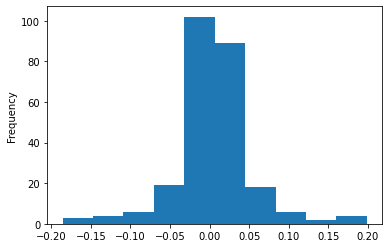

In [32]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
# YOUR CODE HERE!
daily_returns["TSLA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

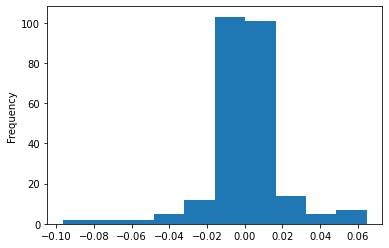

In [33]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
# YOUR CODE HERE!
daily_returns["KO"].plot.hist()

<AxesSubplot:ylabel='Density'>

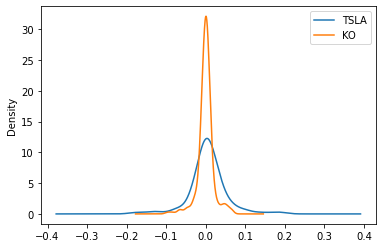

In [34]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
# YOUR CODE HERE!
daily_returns.plot.density()